# Knock airport Weather
# Author: Michal Gondek

In [ ]:
# Create a notebook called assignment_6_Weather.ipynb
# Plot:The temperature
# The mean temperature each day
# The mean temperature for each month



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import requests

# Import URL and request raw text 
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
raw_text = requests.get(url).text
lines = raw_text.splitlines()

# Loop through list to access correct information using enumerate function
header_index = None
for i, line in enumerate(lines):
    if line.lower().startswith('date,'):
        header_index = i
        break

if header_index is None:
    raise ValueError("Cannot find proper CSV header")

# Read CSV from header line 
csv_text = "\n".join(lines[header_index:])
df = pd.read_csv(StringIO(csv_text), sep=",", engine='python', on_bad_lines='skip')

# Normalize column names
df.columns = [c.strip().lower() for c in df.columns]

# Inspect column names
print("Columns found:", df.columns)

# Map actual columns
date_col = [c for c in df.columns if 'date' in c.lower()][0]
temp_col = [c for c in df.columns if 'temp' in c.lower() and 'wetb' not in c.lower()][0]
wdsp_col = [c for c in df.columns if 'wdsp' in c.lower()][0]

print("Using columns:", date_col, temp_col, wdsp_col)

# Convert columns
df[date_col] = pd.to_datetime(df[date_col], errors='coerce', dayfirst=True)
df[temp_col] = pd.to_numeric(df[temp_col], errors='coerce')
df[wdsp_col] = pd.to_numeric(df[wdsp_col], errors='coerce')

# Set date as index
df = df.set_index(date_col)

# Drop rows with no useful data
df = df.dropna(subset=[temp_col, wdsp_col], how='all')

print(df.head())


Columns found: Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')
Using columns: date temp wdsp


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10044\4056077556.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce', dayfirst=True)


                     ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
date                                                                          
1996-04-10 14:00:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1996-07-31 08:00:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
1996-07-31 09:00:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
1996-07-31 10:00:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
1996-07-31 11:00:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

                        msl  ind.3  wdsp  ind.4 wddir  ww   w  sun    vis  \
date                                                                        
1996-04-10 14:00:00  1016.7      0   0.0      0     0  25  81  0.0  35000   
1996-07-31 08:00:00  1011.4      0   0.0      0     0  25  82  0.0  40000   
1996-07-31 09:00:00  1011.4      0   0.0      0     0  80  81  0.0   8000   
1996-07-31 10:00:00  1011.2      0   0.0      0     0  25  82

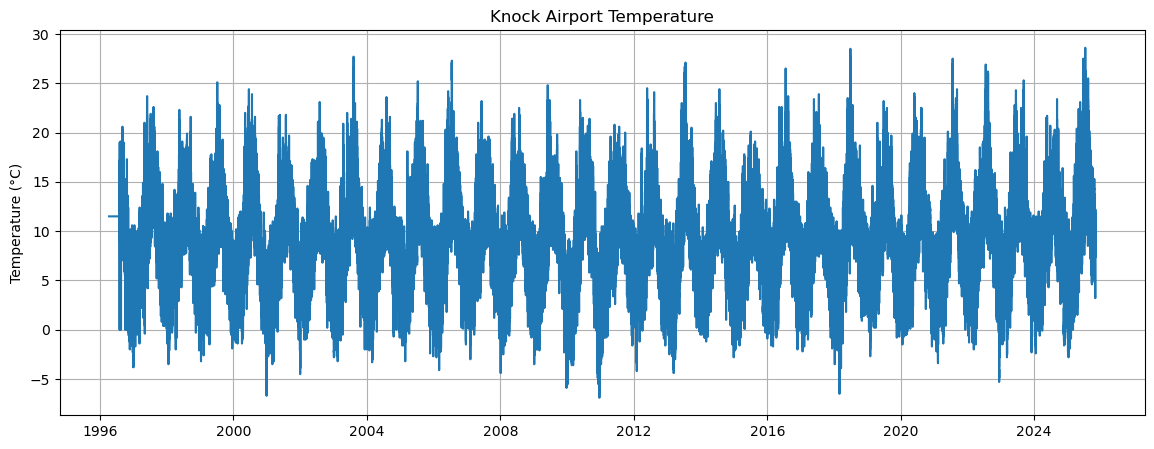

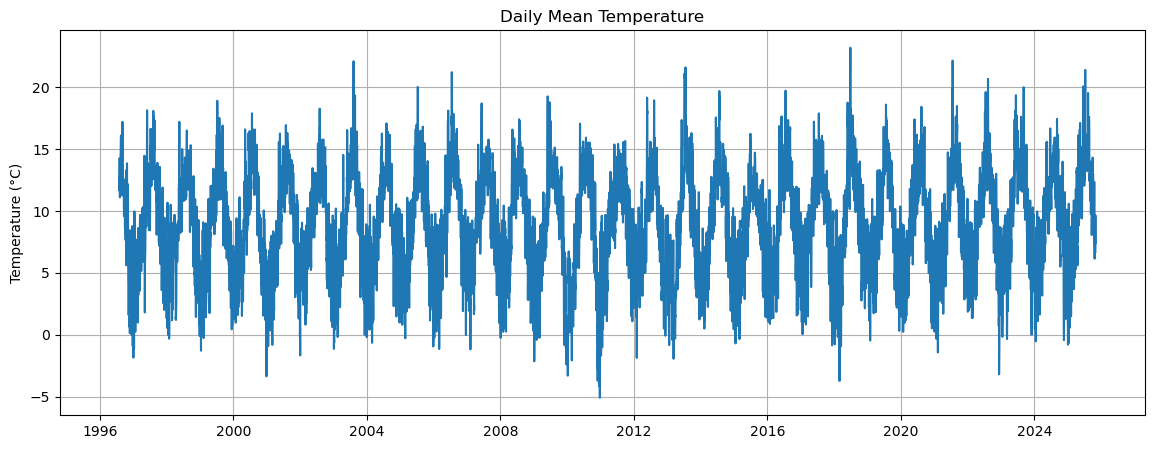

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10044\1036916331.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = df['temp'].resample('M').mean()


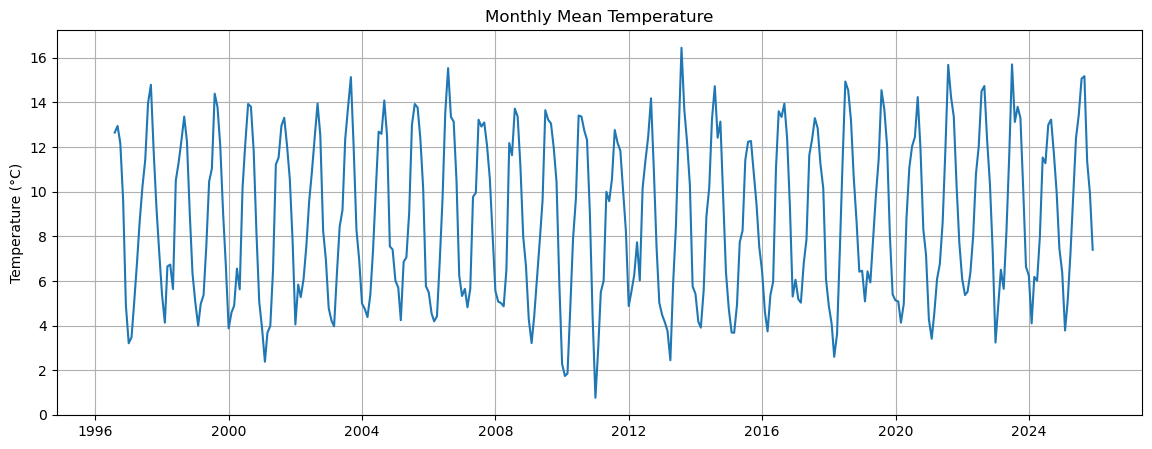

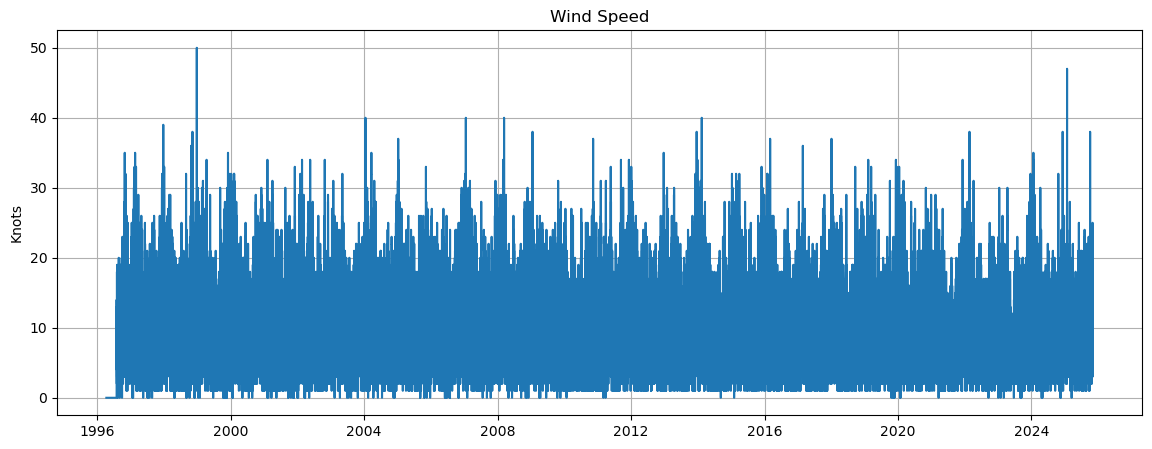

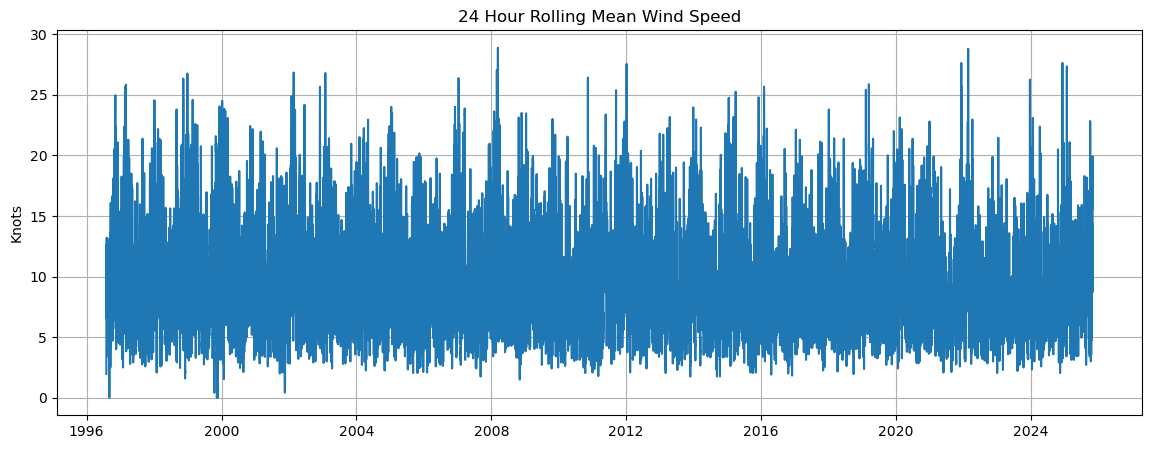

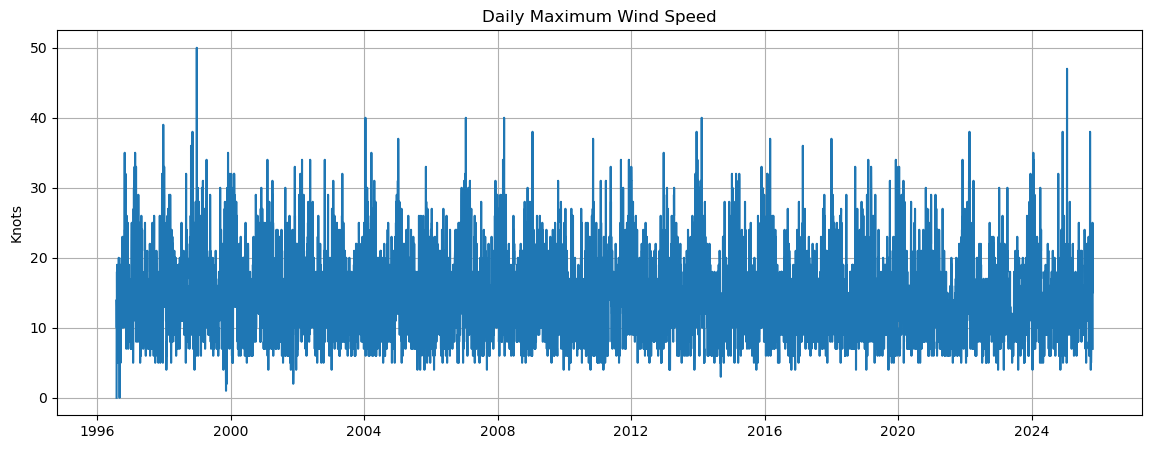

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10044\1036916331.py:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_max = daily_max.resample('M').mean()


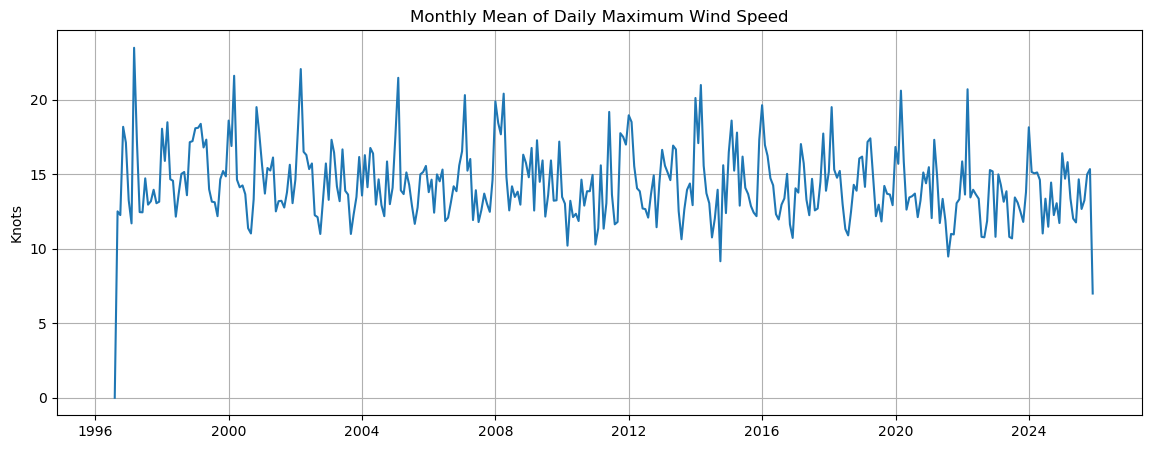

In [ ]:
import matplotlib.pyplot as plt

# PART 1: TEMPERATURE


# Raw temperature
plt.figure(figsize=(14,5))
plt.plot(df.index, df['temp'])
plt.title("Knock Airport Temperature")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()

# Daily mean
daily_temp = df['temp'].resample('D').mean()
plt.figure(figsize=(14,5))
plt.plot(daily_temp)
plt.title("Daily Mean Temperature")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()

# Monthly mean
monthly_temp = df['temp'].resample('M').mean()
plt.figure(figsize=(14,5))
plt.plot(monthly_temp)
plt.title("Monthly Mean Temperature")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()

# PART 2  Wind Speed


# Raw wind speed
plt.figure(figsize=(14,5))
plt.plot(df.index, df['wdsp'])
plt.title("Wind Speed")
plt.ylabel("Knots")
plt.grid()
plt.show()

# 24 hour rolling mean
rolling_wind = df['wdsp'].rolling(24).mean()
plt.figure(figsize=(14,5))
plt.plot(rolling_wind)
plt.title("24 Hour Rolling Mean Wind Speed")
plt.ylabel("Knots")
plt.grid()
plt.show()

# Daily maximum
daily_max = df['wdsp'].resample('D').max()
plt.figure(figsize=(14,5))
plt.plot(daily_max)
plt.title("Daily Maximum Wind Speed")
plt.ylabel("Knots")
plt.grid()
plt.show()

# Monthly mean of daily maximum
monthly_mean_max = daily_max.resample('M').mean()
plt.figure(figsize=(14,5))
plt.plot(monthly_mean_max)
plt.title("Monthly Mean of Daily Maximum Wind Speed")
plt.ylabel("Knots")
plt.grid()
plt.show()